In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 
import re
import random

from sklearn.preprocessing import OneHotEncoder
# import custom_mglearn
# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [3]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 1-1. 항목별 생존 비율 시각화를 통한 데이터 둘러보기

### A. Age - Survived

In [4]:
data_df['Age'].max()

80.0

Text(0.5, 1.0, 'Age Frequency')

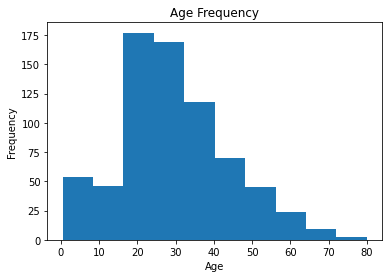

In [5]:
# age_hist = data_df['Age'].plot(kind='hist', figsize=(6,6))
age_hist = plt.hist(data_df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency')

In [6]:
# Age 를 20세별로 묶어서 dataframe 에 새로 추가하기

# 방법 1 - 반복문 돌려 새 열에 값 할당하기

data_df['Age_range_20'] = ''

for idx, age in enumerate(data_df['Age']):
    if age >= 60:
        data_df.at[idx, 'Age_range_20'] = '60+'
    elif age >= 40:
        data_df.at[idx, 'Age_range_20'] = '4050'
    elif age >= 20:
        data_df.at[idx, 'Age_range_20'] = '2030'    
    elif age >= 0:
        data_df.at[idx, 'Age_range_20'] = '0010'
    else:
        data_df.at[idx, 'Age_range_20'] = 'Null'

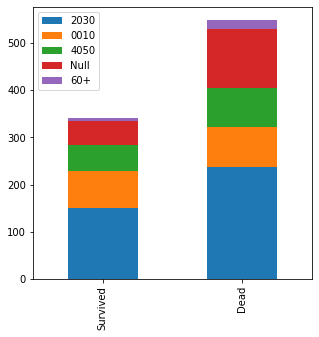

In [7]:
# 연령 20세 단위 구간별 생존자, 사망자 수 구하기

def survived_graph(value):
    survived = data_df[data_df['Survived']==1][value].value_counts()
    dead = data_df[data_df['Survived']==0][value].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(5,5))
    
survived_graph('Age_range_20')

In [8]:
# 방법 2 - .cut() 함수 사용해서 10세별로 묶기

bins = list(range(0, 100, 10))
age_groups = [str(x) + ' to ' + str(x+9) for x in bins]

data_df['Age_range_10'] = pd.cut(data_df['Age'], bins, right=False, labels = age_groups[:-1], include_lowest = True)

# 60 세 이상 연령 묶기

data_df.replace(to_replace = age_groups[6:], value = 'over 60', inplace=True)
data_df [(data_df['Age_range_10'] == 'over 60') ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range_20,Age_range_10
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,60+,over 60
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,60+,over 60
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,60+,over 60
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,60+,over 60
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,60+,over 60
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,60+,over 60
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,60+,over 60
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,60+,over 60
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,60+,over 60
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,60+,over 60


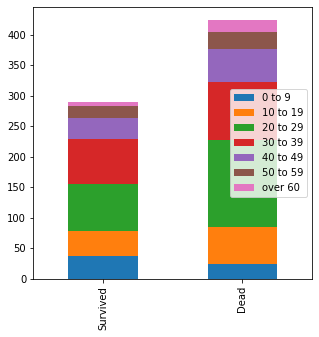

In [9]:
# 연령 10세 단위 구간별 생존자, 사망자 수 구하기

survived_graph('Age_range_10')

In [10]:
# 연령별 생존율 구하기

grouped = data_df.groupby(data_df['Age_range_10'])
surv_rate_age = grouped.sum().Survived / grouped.size()
surv_df = pd.DataFrame(surv_rate_age, columns=['survivalrate'])
surv_df

,survivalrate
Age_range_10,
0 to 9,0.612903
10 to 19,0.401961
20 to 29,0.350000
30 to 39,0.437126
40 to 49,0.382022
50 to 59,0.416667
over 60,0.269231


### B. Name(Title) - Survived

In [11]:
# Name 에서 Title 꺼낸 열 만들기

data_df['title'] = ''

for idx, x in enumerate(data_df['Name']):
    exp = re.compile(r'[A-Za-z]+\.')
    exp_result = exp.search(x)
    data_df.at[idx, 'title'] = exp_result.group().replace('.', '')
       
dict_names = Counter(data_df['title'])
dict_names

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

In [12]:
# 소수의 title 'other' 로 묶기

title_list = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev']

for idx, x in enumerate(data_df['title']):
    if x not in title_list:
        data_df.at[idx, 'title'] = 'other'

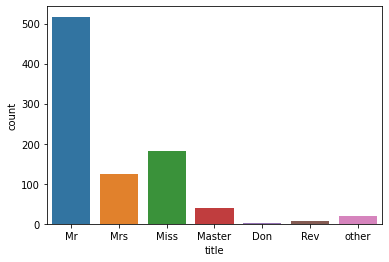

In [13]:
# Title 별 개수 시각화

title_df = pd.DataFrame(data_df['title'])
sns.countplot(x='title', data=title_df)
plt.show()

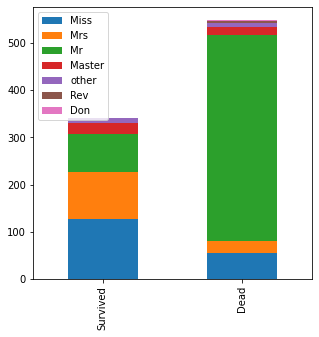

In [14]:
# 앞서 만든 함수 불러와서 시각화
    
survived_graph('title')

### C. Embarked - Survived

In [15]:
count=data_df.Survived[data_df.Embarked=='S'].value_counts()
count

0    427
1    217
Name: Survived, dtype: int64

<AxesSubplot:>

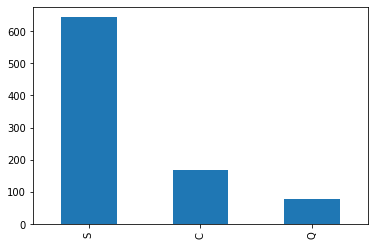

In [16]:
# 각 탑승객 수 시각화

data_df.Embarked.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Survived'>

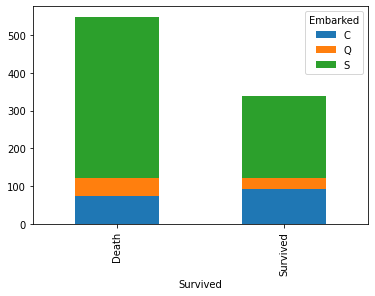

In [17]:
# plot(Survived -- Embarked)

data_df.Survived = data_df.Survived.replace([0,1],['Death','Survived'])
pd.crosstab(data_df.Survived, data_df.Embarked).plot.bar(stacked=True)

In [18]:
data_df.Survived = data_df.Survived.replace(['Death','Survived'],[0,1])
ct = pd.crosstab(data_df.Survived, data_df.Embarked)
ct

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [19]:
# get surv_rate, dead_rate

def rating(df):
    
    col_n = len(df.columns) #3 -> 0,1,2
    dead_dic ={}
    surv_dic ={}
    
    for i in range(col_n):
        surv_rate = df[df.columns[i]][1]/sum(df[df.columns[i]])
        dead_rate = df[df.columns[i]][0]/sum(df[df.columns[i]])
        surv_dic[df.columns[i]]= round(surv_rate,4)
        dead_dic[df.columns[i]]= round(dead_rate,4)
    
    row_s = pd.Series(data=surv_dic, name='surv_rate')
    row_d = pd.Series(data=dead_dic, name='dead_rate')
    
    
    #append row to the dataframe
    df= df.append(row_s, ignore_index=False)
    df= df.append(row_d, ignore_index=False)   
    
    return df

In [20]:
ct = rating(ct)
ct

,C,Q,S
Survived,,,
0,75.0000,47.0000,427.000
1,93.0000,30.0000,217.000
surv_rate,0.5536,0.3896,0.337
dead_rate,0.4464,0.6104,0.663


<AxesSubplot:>

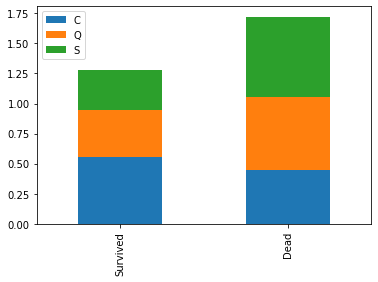

In [21]:
data = ct.iloc[2:] #only for surv_rate, dead_rate
data.index = ['Survived', 'Dead']
data.plot.bar(stacked=True)

### D. Cabin - Survived

In [22]:
#Cabin이 널값이 아닌 데이터를 복사해놓음

Not_NanCabin = data_df[data_df["Cabin"].notnull()]

#Cabin이 널값인 데이터를 복사해놓음
NanCabin = data_df[data_df["Cabin"].isnull()]

In [23]:
#Cabin열의 값을 알파벳으로 자르는 함수선언

def cabin_str(df):
    col_list = []
    for row in df.index:
        cabin_str = str(df["Cabin"][row]).upper()
        col_list.append(cabin_str[0])
    
    return col_list

In [24]:
#함수를 사용하여 잘라준 알파벳리스트를 Cabin열에 다시 넣어줌

data_df["Cabin"] = cabin_str(data_df)

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

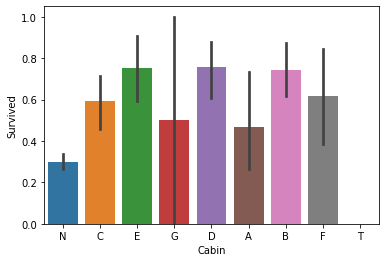

In [25]:
# 선실유형별 생존율

sns.barplot(x='Cabin', y='Survived', data=data_df)

# "C, E, D, B, F"로 시작하는 선실타입은 생존율이 높은반면
# "G, A"는 생존율이 비교적 낮고
# "N"은 매우 낮음
# : 사망자와 생존자 중 선실유형 분포율 보기.

<AxesSubplot:ylabel='Survived'>

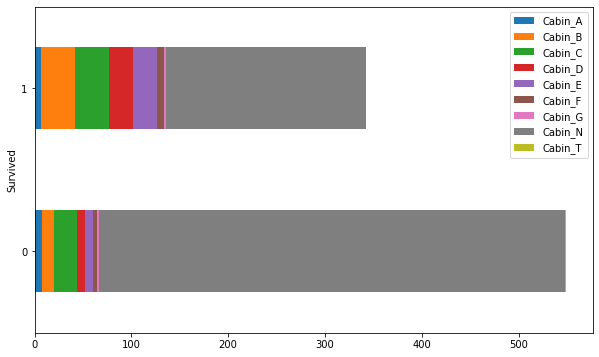

In [26]:
# 생존/사망별 선실유형 분포율

temp_df = data_df[["Survived", "Cabin"]]
Survived_Cabin = pd.get_dummies(temp_df, columns = ["Cabin"])
Survived_Cabin_bar = pd.pivot_table(Survived_Cabin, index="Survived", aggfunc=np.sum)
Survived_Cabin_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

# : 선실타입이 NaN값이 많아 압도적으로 많이 나온다.

<AxesSubplot:ylabel='Survived'>

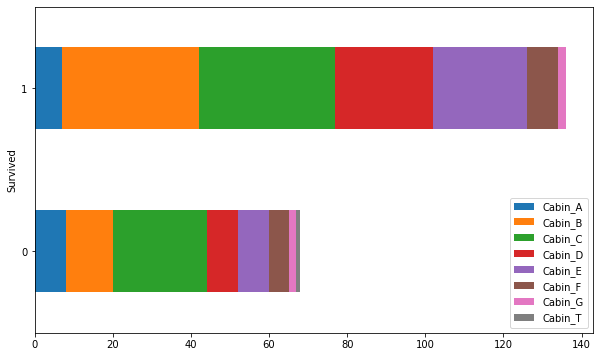

In [27]:
# 생존/사망별 선실유형(Not NaN) 분포율

Not_NanCabin["Cabin"] = cabin_str(Not_NanCabin)
temp_df2 = Not_NanCabin[["Survived", "Cabin"]]
N_n_Survived_Cabin = pd.get_dummies(temp_df2, columns = ["Cabin"])
N_n_Survived_Cabin_bar = pd.pivot_table(N_n_Survived_Cabin, index="Survived", aggfunc=np.sum)
N_n_Survived_Cabin_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

<AxesSubplot:ylabel='Cabin'>

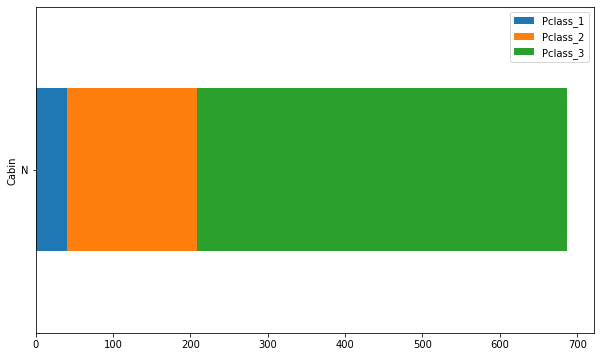

In [28]:
# 선실유형 NaN값의 Pclass분포도

NanCabin["Cabin"] = cabin_str(NanCabin)

temp_CabinN = NanCabin[["Cabin", "Pclass"]]
Cabin_null = pd.get_dummies(temp_CabinN, columns = ["Pclass"])
Cabin_n_bar = pd.pivot_table(Cabin_null, index="Cabin", aggfunc=np.sum)
Cabin_n_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

<AxesSubplot:ylabel='Cabin'>

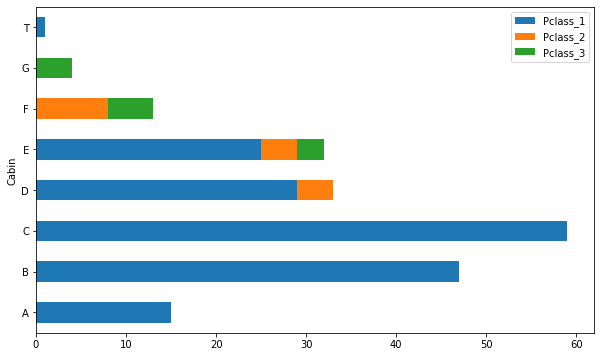

In [29]:
# 선실유형 Not NaN값의 Pclass분포도
temp_df2 = Not_NanCabin[["Pclass", "Cabin"]]
N_n_Pclass_Cabin = pd.get_dummies(temp_df2, columns = ["Pclass"])
N_n_Pclass_Cabin_bar = pd.pivot_table(N_n_Pclass_Cabin, index="Cabin", aggfunc=np.sum)
N_n_Pclass_Cabin_bar.plot(kind="barh", stacked=True, width=0.5, figsize=((10,6)))

<AxesSubplot:ylabel='Cabin'>

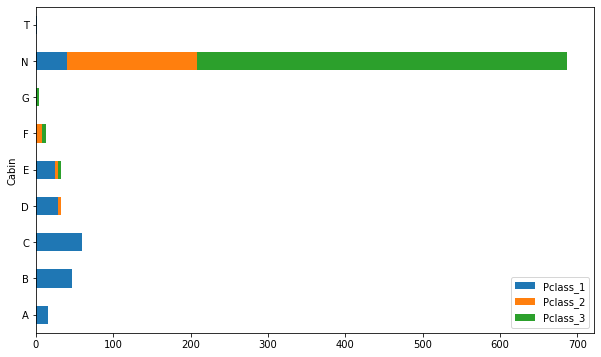

In [30]:
# 전체 선실유형 중 Pclass분포도

temp_all_df = data_df[["Pclass", "Cabin"]]
Pclass_Cabin = pd.get_dummies(temp_all_df, columns = ["Pclass"])
Pclass_Cabin_bar = pd.pivot_table(Pclass_Cabin, index="Cabin", aggfunc=np.sum)
Pclass_Cabin_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

<AxesSubplot:ylabel='Survived'>

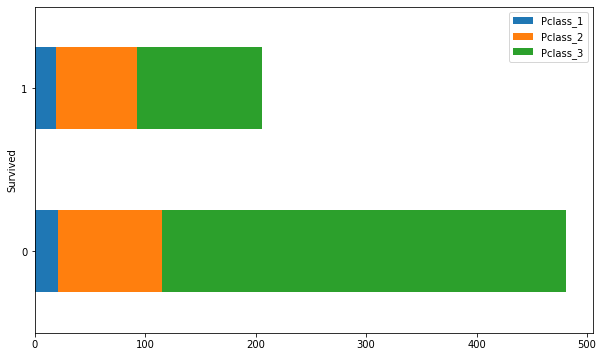

In [31]:
# 선실유형 NaN값의 생존/사망별 Pclass분포도 (= data_df[["Survived", "Pclass"]][data_df["Cabin"] == "N"]
temp_CabinN = NanCabin[["Survived", "Pclass"]]
Cabin_null = pd.get_dummies(temp_CabinN, columns = ["Pclass"])
Cabin_n_bar = pd.pivot_table(Cabin_null, index="Survived", aggfunc=np.sum)
Cabin_n_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

<AxesSubplot:xlabel='Survived'>

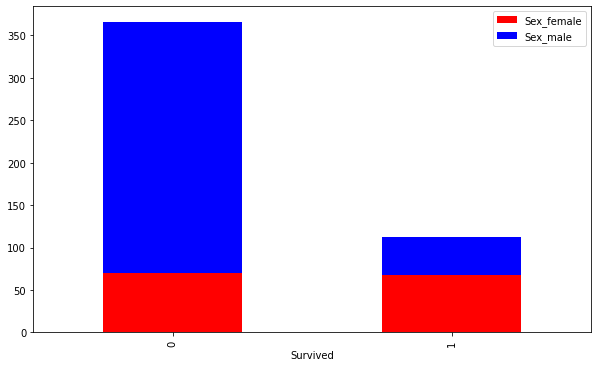

In [32]:
# (선실유형 NaN값 & Pclass: 3)의 생존/사망별 성별의 분포

temp_CabinN = data_df[["Survived","Sex","Pclass"]][data_df["Cabin"] == "N"]
temp_Class3 = temp_CabinN[["Survived","Sex","Pclass"]][temp_CabinN["Pclass"] == 3]
temp_Cabin_N3 = temp_Class3[["Survived", "Sex"]]
Cabin_n_3 = pd.get_dummies(temp_Cabin_N3, columns = ["Sex"])
Cabin_n_3_bar = pd.pivot_table(Cabin_n_3, index="Survived", aggfunc=np.sum)
Cabin_n_3_bar.plot(kind="bar", stacked=True, width=0.5, figsize=(10,6),color=['r', 'b'])

### E. Pclass - Survived

In [33]:
# Survived와 Pclass의 상관관계확인을 위해 두개의 열만 선택
new_df = data_df[['Survived', 'Pclass']]
new_df.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [34]:
# Pclass열만 one-hot 인코딩

new_enc_df=pd.get_dummies(new_df, columns = ['Pclass'])
new_enc_df.head()

,Survived,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,1
1,1,1,0,0
2,1,0,0,1
3,1,1,0,0
4,0,0,0,1


In [35]:
#인덱스 설정

newind_df = pd.pivot_table(new_enc_df, index='Survived', aggfunc=np.sum)
newind_df

,Pclass_1,Pclass_2,Pclass_3
Survived,,,
0,80,97,372.0
1,136,87,119.0


In [36]:
newindx_df=newind_df.rename(index = {0:'Dead', 1: 'Survived'})
newindx_df

,Pclass_1,Pclass_2,Pclass_3
Survived,,,
Dead,80,97,372.0
Survived,136,87,119.0


<AxesSubplot:xlabel='Survived'>

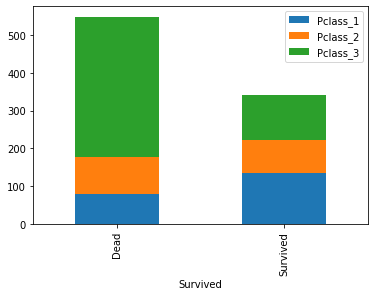

In [37]:
# 생존자와 Pclass의 수 시각화
newindx_df.plot.bar(stacked= True)

### F. Fare - Survived

In [38]:
data_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
# Fare 열 범주화 (항목별로 5단위씩)

anayl_data = data_df[['Survived', 'Fare']]
anayl_data.head()

bins = [0,5,10,15,20,25,30,35,50,100, 200, 300] 
bins_names = ["1st","2nd",'3rd',"4th",'5th',"6th",'7th',"8th",'9th', '10th', '11th']

# .cut() 함수 사용
Fare_categories = pd.cut(anayl_data['Fare'], bins, labels = bins_names)
data_df['Fare_D'] = Fare_categories

# anayl_data = anayl_data.groupby(anayl_data['Fare_D']).sum()
# anayl_data

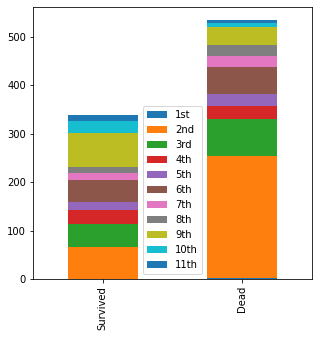

In [40]:
# Fare 별 생존 개수 시각화

survived_graph('Fare_D')


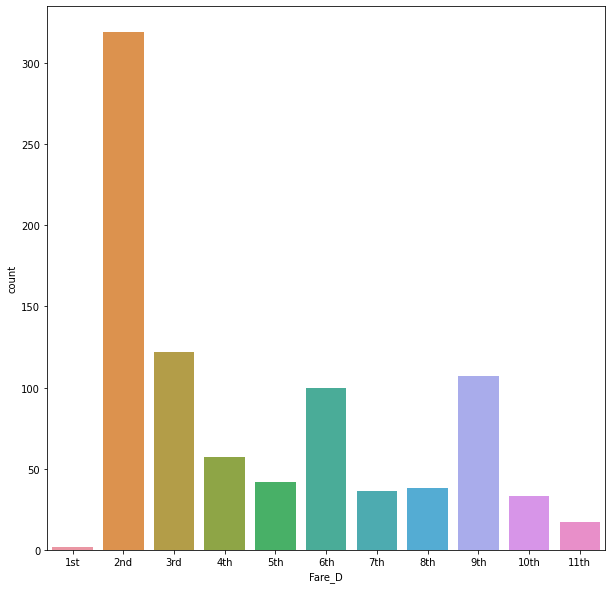

In [41]:
# Fare 범주별 Survived 시각화

plt.figure(figsize=(10,10))
sns.countplot(x='Fare_D', data=data_df)
plt.show()

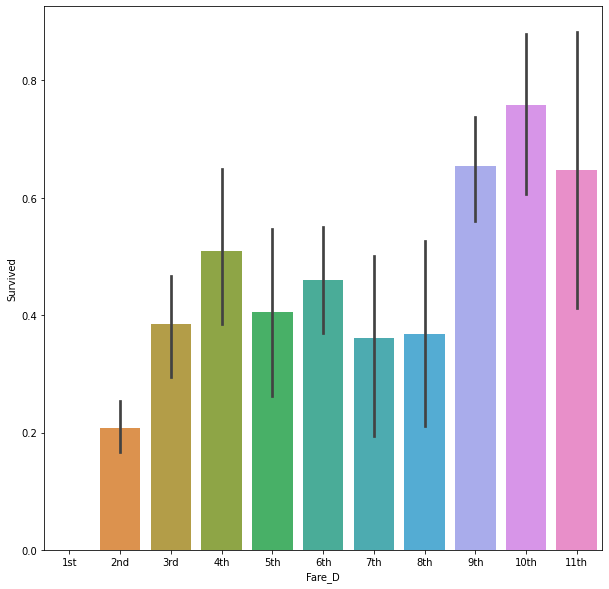

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Fare_D', y = 'Survived', data = data_df)
plt.show()

In [43]:
# # 수정 필요 (??)

# sample_df = pd.concat([x_data_new, y_data], axis = 1)   
# sample_df.corr()

# plt.figure(figsize=(10,10))
# sns.heatmap(data = anayl_data.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')


<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

## 2-1. y data, x data 만들기

In [44]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [45]:
del data_df['Survived']
x_data = data_df.copy()

In [46]:
x_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range_20,Age_range_10,title,Fare_D
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2030,20 to 29,Mr,2nd
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2030,30 to 39,Mrs,9th
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,2030,20 to 29,Miss,2nd


## 2-2. 불필요한 열 삭제, 필요한 열 추가

In [47]:
x_data.drop(['PassengerId', 'Name', 'Ticket', 'Age_range_20', 'Age_range_10', 'Fare_D'], inplace=True,axis=1)

In [48]:
x_data['Family'] = x_data['SibSp'] + x_data['Parch']
x_data.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

## 2-3. 결측치 채우기

In [49]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Cabin     891 non-null    object 
 5   Embarked  889 non-null    object 
 6   title     891 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


### A. Age 결측치

In [50]:
# 기존 데이터의 Age 를 하나의 pool 로 만들어 랜덤 추출후 값 지정

age_list = [ x for x in x_data['Age'].dropna()] 

for idx, x in enumerate(x_data['Age'].isnull()):
    new_x = random.choice(age_list)
    if x == True:
        x_data.at[idx, 'Age'] = new_x

### B. Cabin 결측치

전체 선실유형 중 Pclass 분포도 시각화 그래프 참고

In [51]:
# 선실유형을 알파벳 앞자리로 잘라줌
x_data["Cabin"] = cabin_str(x_data)

# 선실유형의 null값을 Pclass에 따라 random하게 배정해줄 함수 선언
def fillnull(df):
    colList = []
    
    P1_CabinList = ["A", "B", "C", "D", "E"]
    P2_CabinList = ["D", "E", "F"]
    P3_CabinList = ["E", "F", "G"]
    for row in df.index:
        CabinName = df["Cabin"][row]
        PclassName = df["Pclass"][row]
        if CabinName == "N":
            if PclassName == 1:
                colList.append(random.choice(P1_CabinList))
            elif PclassName == 2:
                colList.append(random.choice(P2_CabinList))
            else:
                colList.append(random.choice(P3_CabinList))
        else:
            colList.append(CabinName)
    
    return colList

x_data["Cabin"] = fillnull(x_data)

### C. Embarked 결측치

In [52]:
# replace null values(2) --> 'S'

x_data[x_data.Embarked.isnull()] #index 61/829

x_data.Embarked[x_data.index==61]='S'
x_data.Embarked[x_data.index==829]='S'

x_data[x_data.Embarked.isnull()]

,Pclass,Sex,Age,Fare,Cabin,Embarked,title,Family


### D. Fare 결측치

In [53]:
#결측치 환산

mean_Fare = x_data['Fare'].median(skipna=True)
x_data['Fare'] = x_data['Fare'].fillna(mean_Fare)

## 2-4. 엔코딩

In [54]:
# Embarked one-hot encoding (C = Cherbourg, Q = Queenstown, S = Southampton)

temp = pd.get_dummies(x_data['Embarked'], drop_first=False, prefix = 'embarked')
x_data = pd.concat([x_data,temp],axis=1)
del x_data['Embarked']

# Sex one-hot encoding 

temp = pd.get_dummies(x_data['Sex'], drop_first=False, prefix = 'Sex') 
x_data = pd.concat([x_data,temp],axis=1)
del x_data['Sex']

# Title one-hot encoding 
temp = pd.get_dummies(x_data['title'], drop_first=False, prefix = 'title') 
x_data = pd.concat([x_data,temp],axis=1)
del x_data['title']

# Cabin one-hot encoding 
temp = pd.get_dummies(x_data['Cabin'], drop_first=False, prefix = 'cabin') 
x_data = pd.concat([x_data,temp],axis=1)
del x_data['Cabin']

## 2-5. 정규화(Standardization)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_data[['Fare','Age']])
S_data = scaler.fit_transform(x_data[['Fare','Age']])
S_data

array([[-0.50244517, -0.54949846],
       [ 0.78684529,  0.55251322],
       [-0.48885426, -0.27399554],
       ...,
       [-0.17626324,  1.10351906],
       [-0.04438104, -0.27399554],
       [-0.49237783,  0.13925884]])

In [56]:
x_data['Fare']=S_data[:,0]
x_data['Age']=S_data[:,1]
x_data.head()

,Pclass,Age,Fare,Family,embarked_C,embarked_Q,embarked_S,Sex_female,Sex_male,title_Don,...,title_Rev,title_other,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
0,3,-0.549498,-0.502445,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.552513,0.786845,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,-0.273996,-0.488854,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0.345886,0.420730,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,0.345886,-0.486337,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
# from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
X = np.array(x_data)#X_data(set)
y = np.array(y_data)#y_data

In [59]:
# $ conda install xgboost

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0) #excel --> colab ?
#if shuffle?


In [61]:
print(X_train.shape) #70% ; 354행
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 24)
(268, 24)
(623, 1)
(268, 1)


<br>

## 3. Create model instance variable& Training the model
- (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)
### 3-1 : GradientBoostingClassifier

In [93]:
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}# gradient search --- SVM (hyper-para 성능향상)

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train,y_train)
#accurcy score, roc_auc f1 scoure
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_test = accuracy_score(y_test, clf.predict(X_test))
print("The accuracy score on training set: {:.4f}".format(acc_train))
print("The accuracy score on test set: {:.4f}".format(acc_test))

The accuracy score on training set: 0.9470
The accuracy score on test set: 0.8433


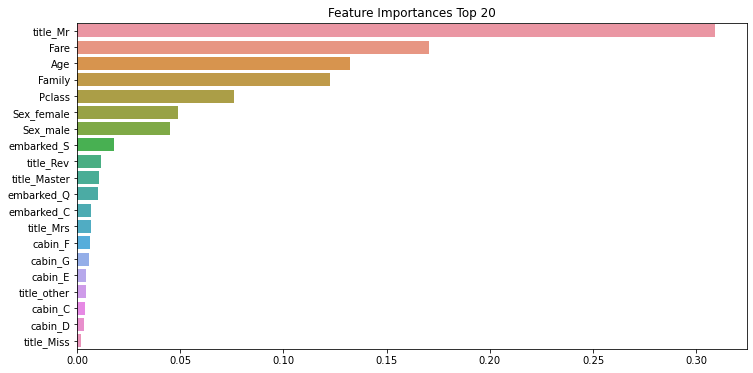

In [112]:
#feature 중요도도 그려볼 수 있다. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importances_values = clf.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=x_data.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(12, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

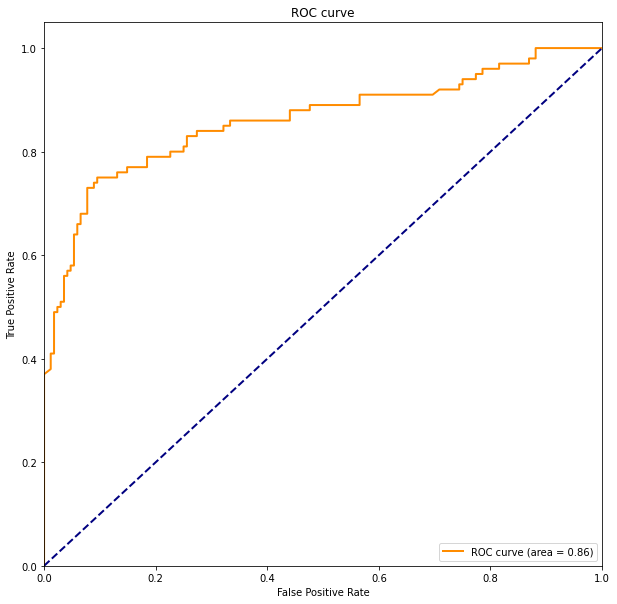

In [96]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=clf.predict_proba(X_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [97]:
from sklearn.metrics import classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       168
           1       0.82      0.75      0.78       100

   micro avg       0.84      0.84      0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

Accuracy on Training set: 0.947
Accuracy on Test set: 0.843


In [99]:
#GridSearchCV -- 최적의 hyper-parameter 조건 찾기
from sklearn.model_selection import GridSearchCV
# 아래 param_grid dict 의 C & gamma 에 후보 Hyper-params 값들을 리스트업합니다.
#svc(parameter) ; parmeter 그대로 'str' 잘 써줘야함
param_grid = {'n_estimators': [50,100,200, 500, 1000], #[100,500,1000]
             'max_depth' : [3, 4, 5, 6, 7],#[4,6,8]
             'min_samples_split' : [5, 7, 10], #'subsample': [0.9, 0.5, 0.2],
             'learning_rate': [0.01,0.02,0.03] }# [0.01,0.1]
#@https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
                    #estimator=clt
grid = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)
print('The best parameters are ', grid.best_params_)
print('The best parameters are ', grid.best_score_)
print('The best parameters are ', grid.best_estimator_)

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:  9.7min finished


The best parameters are  {'learning_rate': 0.03, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
The best parameters are  0.8346709470304976
The best parameters are  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [100]:
grid_predictions = grid.predict(X_test)
# Precision, Recall, F1-score 등을 확인할 수 있습니다.(support ; y_test data 개수)
print(classification_report(y_test, grid_predictions))


print("Accuracy on Training set: {:.3f}".format(grid.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(grid.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       168
           1       0.81      0.75      0.78       100

   micro avg       0.84      0.84      0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

Accuracy on Training set: 0.884
Accuracy on Test set: 0.840


### 3-2 XGBoost

In [120]:
# Xgboost import 
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4)
model.fit(X_train, y_train)

acc = accuracy_score(y_test, model.predict(X_test))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.8060

In [ ]:
# parameter 최적화

from sklearn.model_selection import GridSearchCV

model_param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth' : [1, 4, 6, 8, 12]
}

xgb_grid = GridSearchCV(model, param_grid = model_param_grid, scoring = 'accuracy', n_jobs=-1, verbose =1)
xgb_grid.fit(X_train, y_train)

# 최적화 결과 보기

print('The best parameters are :', xgb_grid.best_params_)
print('The best accuracy score is : ', xgb_grid.best_score_)

The best parameters are : {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200} <br>
The best accuracy score is :  0.8282838709677419

In [ ]:
# Classification Report

from sklearn.metrics import classification_report

grid_predictions = xgb_grid.predict(X_test)
print(classification_report(y_test, grid_predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(xgb_grid.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(xgb_grid.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       168
           1       0.79      0.75      0.77       100

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268 
weighted avg       0.83      0.83      0.83       268 

Accuracy on Training set: 0.881
Accuracy on Test set: 0.832

<br>

### 3-3. SVM(Support Vector Machine)

In [81]:
import custom_mglearn
from sklearn.svm import SVC #SVC ; SVM Classifier <--> SVR ; SVM Regressor
# from sklearn import svm
# model = svm.SVC()
# model.fit
#
svc = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)
#kernel(가우시안 커널) C/gamma 중요한 hyper-parameter
print("Accuracy on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on Training set: 0.886
Accuracy on Test set: 0.810


In [105]:
from sklearn.model_selection import GridSearchCV

# 아래 param_grid dict 의 C & gamma 에 후보 Hyper-params 값들을 리스트업합니다.
#svc(parameter) ; parmeter 그대로 'str' 잘 써줘야함
param_grid_svc = {'C' : [0.1, 1, 10, 100, 1000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['rbf']}

#GridSearchCV(튜닝할 model(svm.SVC()),parameters,)
grid_svc = GridSearchCV(SVC(), param_grid_svc, refit=True, verbose=1)
grid_svc.fit(X_train, y_train)
print('The best parameters are ', grid.best_params_)
print('The best parameters are ', grid.best_score_)
print('The best parameters are ', grid.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are  {'learning_rate': 0.03, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
The best parameters are  0.8346709470304976
The best parameters are  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.8s finished


In [107]:
from sklearn.metrics import classification_report# roc, fl_score, recall_socre ..

grid_predictions = grid_svc.predict(X_test)
# Precision, Recall, F1-score 등을 확인할 수 있습니다.(support ; y_test data 개수)
print(classification_report(y_test, grid_predictions))

    
print("Accuracy on Training set: {:.3f}".format(grid_svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(grid_svc.score(X_test, y_test)))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.75      0.77       100

   micro avg       0.83      0.83      0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

Accuracy on Training set: 0.844
Accuracy on Test set: 0.828


### 3-4 LogisticRegression

In [122]:
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report

model = linear_model.LogisticRegression()
# 4. Train the model
model.fit(X_train, y_train)
# 5. Test the model
print('Accuracy: ', accuracy_score(model.predict(X_test), y_test))


Accuracy:  0.8246268656716418


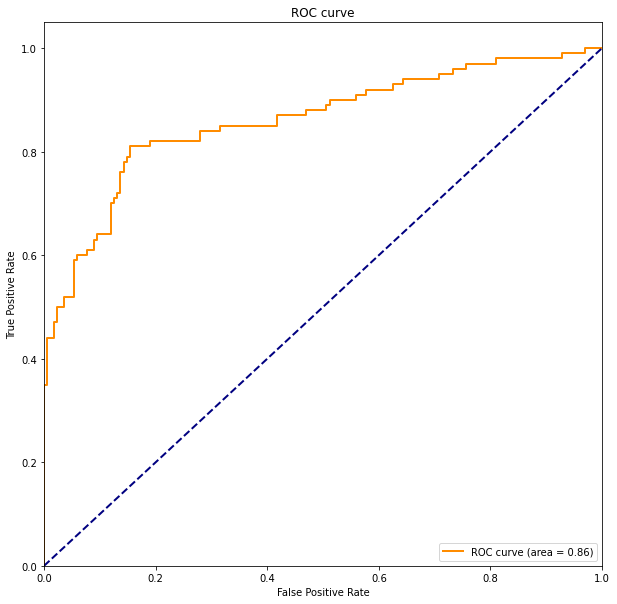

In [123]:
# 6. Visualize the model
pred_test = model.predict_proba(X_test) # Predict 'probability'
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [124]:
## Precision, Recall, F1-score
predictions = model.predict(X_test)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.
print("Accuracy on Training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(model.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       168
           1       0.76      0.77      0.77       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Accuracy on Training set: 0.838
Accuracy on Test set: 0.825


### 3-5 KNN

In [ ]:
#KNN
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

#Knn모델 형성
model = neighbors.KNeighborsClassifier(20) # K-Neighbors & 클러스터 분류 (Classifier)


#객체 학습 (7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(array_data, array_target, test_size = 0.3, random_state=0)

model.fit(X_train, y_train)



# GridSearchCV로 최적값 찾기(실행시키면 15분 이상 걸립니다...)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
# 아래 param_grid dict 의 C & gamma 에 후보 Hyper-params 값들을 리스트업합니다.
#svc(parameter) ; parmeter 그대로 ‘str’ 잘 써줘야함
param_grid = {'n_estimators': [50,100,200, 500, 1000],#[100,500,1000]
             'max_depth' : [3, 4, 5, 6, 7],#[4,6,8]
             'min_samples_split' : [5, 7, 10], #‘subsample’: [0.9, 0.5, 0.2],
             'learning_rate': [0.01,0.02,0.03] }# [0.01,0.1]
#@https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
                    #estimator=clt
grid = GridSearchCV (ensemble. GradientBoostingClassifier(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)
print("The best parameters are ", grid.best_params_)
print("The best parameters are ", grid.best_score_)
print("The best parameters are ", grid.best_estimator_)
# 결과값
# Fitting 3 folds for each of 225 candidates, totalling 675 fits
# [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
# [Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed: 27.6min finished
# The best parameters are  {'learning_rate': 0.02, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}
# The best parameters are  0.8426966292134831
# The best parameters are  GradientBoostingClassifier(criterion='friedman_mse', init=None,
#               learning_rate=0.02, loss='deviance', max_depth=4,
#               max_features=None, max_leaf_nodes=None,
#               min_impurity_decrease=0.0, min_impurity_split=None,
#               min_samples_leaf=1, min_samples_split=5,
#               min_weight_fraction_leaf=0.0, n_estimators=100,
#               n_iter_no_change=None, presort='auto', random_state=None,
#               subsample=1.0, tol=0.0001, validation_fraction=0.1,
#               verbose=0, warm_start=False)



# 그래프로 K값이 몇일때 가장 높은지 확인.
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = neighbors.KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [ ]:
#성능평가 accuracy
print(model.score(X_test, y_test))

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

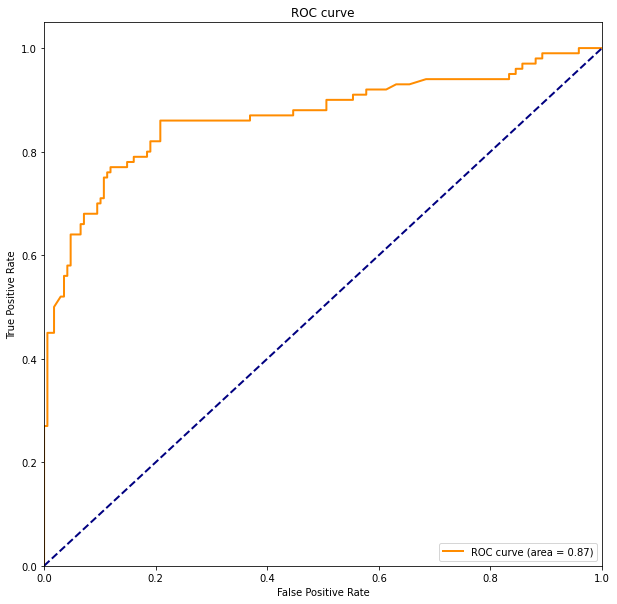

In [126]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=grid.predict_proba(X_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()